In [1]:
required_packages <- c("biscale", "cowplot", "patchwork", "tidyverse", "usmap")
new_packages <- required_packages[!(required_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

In [2]:
library(biscale)
library(cowplot)
library(ggplot2)
library(patchwork)
library(readr)
library(usmap)

# Set figure sizes
options(repr.plot.width = 9, repr.plot.height = 6)


Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




# Prevalence by state

In [3]:
# Import data for 2007 and 2018
data_2007 <- read_csv("./data/Specific_Chronic_Conditions_2007_data.csv")
data_2018 <- read_csv("./data/Specific_Chronic_Conditions_2018_data.csv")

# Filter for each state's overall data
states_2007 <- subset(data_2007, (Bene_Geo_Lvl == "State") & (Bene_Age_Lvl == "All") & (Bene_Demo_Lvl == "All"))
states_2018 <- subset(data_2018, (Bene_Geo_Lvl == "State") & (Bene_Age_Lvl == "All") & (Bene_Demo_Lvl == "All"))

# Remove territories and "Unknown"
subset(states_2007, Bene_Geo_Desc == "Unknown") # View the prevalence: null
states_2007 <- subset(states_2007, !(Bene_Geo_Desc %in% c("Puerto Rico", "Virgin Islands", "Unknown")))

subset(states_2018, Bene_Geo_Desc == "Unknown") # View the prevalence: null
states_2018 <- subset(states_2018, !(Bene_Geo_Desc %in% c("Puerto Rico", "Virgin Islands", "Unknown")))

# Preview 2007 data
head(states_2007)

# Preview 2018 data
head(states_2018)

# Convert decimal values to per thousand beneficaries
states_2007$Prevalence <- states_2007$Prvlnc * 1000
states_2018$Prevalence <- states_2018$Prvlnc * 1000
head(states_2007)
head(states_2018)

Rows: 11244 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Bene_Geo_Lvl, Bene_Geo_Desc, Bene_Geo_Cd, Bene_Age_Lvl, Bene_Demo_L...
dbl (1): Prvlnc

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 11244 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Bene_Geo_Lvl, Bene_Geo_Desc, Bene_Geo_Cd, Bene_Age_Lvl, Bene_Demo_L...
dbl (1): Prvlnc

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
State,Unknown,NA,All,All,All,Autism Spectrum Disorders,NA


Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
State,Unknown,NA,All,All,All,Autism Spectrum Disorders,NA


Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
State,Alabama,01,All,All,All,Autism Spectrum Disorders,3e-04
State,Alaska,02,All,All,All,Autism Spectrum Disorders,8e-04
State,Arizona,04,All,All,All,Autism Spectrum Disorders,3e-04
State,Arkansas,05,All,All,All,Autism Spectrum Disorders,4e-04
State,California,06,All,All,All,Autism Spectrum Disorders,6e-04
State,Colorado,08,All,All,All,Autism Spectrum Disorders,5e-04


Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
State,Alabama,01,All,All,All,Autism Spectrum Disorders,0.0017
State,Alaska,02,All,All,All,Autism Spectrum Disorders,0.0026
State,Arizona,04,All,All,All,Autism Spectrum Disorders,0.0010
State,Arkansas,05,All,All,All,Autism Spectrum Disorders,0.0016
State,California,06,All,All,All,Autism Spectrum Disorders,0.0022
State,Colorado,08,All,All,All,Autism Spectrum Disorders,0.0019


Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Prevalence
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
State,Alabama,01,All,All,All,Autism Spectrum Disorders,3e-04,0.3
State,Alaska,02,All,All,All,Autism Spectrum Disorders,8e-04,0.8
State,Arizona,04,All,All,All,Autism Spectrum Disorders,3e-04,0.3
State,Arkansas,05,All,All,All,Autism Spectrum Disorders,4e-04,0.4
State,California,06,All,All,All,Autism Spectrum Disorders,6e-04,0.6
State,Colorado,08,All,All,All,Autism Spectrum Disorders,5e-04,0.5


Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Prevalence
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
State,Alabama,01,All,All,All,Autism Spectrum Disorders,0.0017,1.7
State,Alaska,02,All,All,All,Autism Spectrum Disorders,0.0026,2.6
State,Arizona,04,All,All,All,Autism Spectrum Disorders,0.0010,1.0
State,Arkansas,05,All,All,All,Autism Spectrum Disorders,0.0016,1.6
State,California,06,All,All,All,Autism Spectrum Disorders,0.0022,2.2
State,Colorado,08,All,All,All,Autism Spectrum Disorders,0.0019,1.9


In [4]:
# Select only the relevant columns: Selecting "Bene_Geo_Cd" (the FIPS state code) would also work with slight changes
filtered_2007 <- states_2007[ , c("Bene_Geo_Desc", "Prevalence")]
filtered_2018 <- states_2018[ , c("Bene_Geo_Desc", "Prevalence")]

# Rename columns: usmap wants a column named "state" or "fips" (i.e., if "Bene_Geo_Cd" was selected above)
names(filtered_2007) <- c("state", "Prevalence")
names(filtered_2018) <- c("state", "Prevalence")

In [5]:
# ["How to label numbers instead of names using usmap?"](https://stackoverflow.com/questions/63488086/how-to-label-numbers-instead-of-names-using-usmap)
centroids <- usmapdata::centroid_labels("states")
names(centroids) <- c("x", "y", "fips", "abbr", "state")

centroid_labels_2007 <- merge(centroids, filtered_2007, by = "state")
centroid_labels_2018 <- merge(centroids, filtered_2018, by = "state")

# Filter for states with prevalence at or above certain values (2007)
labels_2007_4 <- subset(centroid_labels_2007, Prevalence >= 4)
labels_2007 <- subset(centroid_labels_2007, Prevalence >= 1)

# Filter for states with prevalence at or above certain values (2018)
labels_2018_1 <- subset(centroid_labels_2018, Prevalence >= 1)
labels_2018_above_1 <- subset(centroid_labels_2018, Prevalence > 1)
labels_2018_2 <- subset(centroid_labels_2018, Prevalence >= 2)
labels_2018_below_1 <- subset(centroid_labels_2018, Prevalence < 1)
labels_2018_4 <- subset(centroid_labels_2018, Prevalence >= 4)
labels_2018 <- subset(centroid_labels_2018, Prevalence >= 3)

# Clean up labels for regional map of the Northeastern U.S. (2007)
states_to_exclude <- c("KS", "MN", "UT", "WI")
labels_2007_region <- subset(labels_2007, !(abbr %in% states_to_exclude))
labels_2007_region

# Clean up labels for regional map of the Northeastern U.S. (2018)
states_to_exclude <- c("IA", "ID", "IN", "MI", "MN", "MO", "ND", "OH", "WI")
labels_2018_region <- subset(labels_2018, !(abbr %in% states_to_exclude))
labels_2018_region

count_2007 <- nrow(labels_2007) # 10 states
sprintf("In 2007, there were %d states with a prevalence at or above 1 in 1000.", count_2007)

count_2007_4 <- nrow(labels_2007_4) # 0 states
sprintf("In 2007, there were %d states with a prevalence at or above 4 in 1000.", count_2007_4)

count_2018_1 <- nrow(labels_2018_1) # All 50 states and the District of Columbia
sprintf("In 2018, there were %d states with a prevalence at or above 1 in 1000.", count_2018_1)

count_2018_above_1 <- nrow(labels_2018_above_1) # 48 states and the District of Columbia
sprintf("In 2018, there were %d states with a prevalence above 1 in 1000.", count_2018_above_1)

count_2018_2 <- nrow(labels_2018_2) # 48 states and the District of Columbia
sprintf("In 2018, there were %d states with a prevalence at or above 2 in 1000.", count_2018_2)

count_2018_below_1 <- nrow(labels_2018_below_1) # 0 states
sprintf("In 2018, there were %d states with a prevalence below 1 in 1000.", count_2007)

count_2018_4 <- nrow(labels_2018_4) # 6 states
sprintf("In 2018, there were %d states with a prevalence at or above 4 in 1000.", count_2007)

count_2018 <- nrow(labels_2018) # 17 states
sprintf("In 2018, there were %d states with a prevalence at or above 3 in 1000.", count_2007)

# Preview data
head(labels_2007)

# Preview data, showing that District of Columbia was one of the 49 "states"
head(labels_2018_above_1, n = 10)

,state,x,y,fips,abbr,Prevalence
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
7,Connecticut,2194987,-6195.839,09,CT,1.3
20,Maine,2345304,484189.453,23,ME,1.0
22,Massachusetts,2186994,79746.111,25,MA,1.4
31,New Jersey,2120272,-268279.574,34,NJ,1.2
33,New York,2005763,95577.900,36,NY,1.5
40,Rhode Island,2308743,34962.144,44,RI,1.0


,state,x,y,fips,abbr,Prevalence
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
7,Connecticut,2194987,-6195.839,09,CT,4.7
8,Delaware,2098575,-388457.704,10,DE,3.1
20,Maine,2345304,484189.453,23,ME,4.3
22,Massachusetts,2186994,79746.111,25,MA,4.3
31,New Jersey,2120272,-268279.574,34,NJ,3.5
33,New York,2005763,95577.900,36,NY,4.7
39,Pennsylvania,1844595,-208004.076,42,PA,3.1
46,Vermont,2117967,312422.878,50,VT,3.2


[1] "In 2007, there were 10 states with a prevalence at or above 1 in 1000."

[1] "In 2007, there were 0 states with a prevalence at or above 4 in 1000."

[1] "In 2018, there were 51 states with a prevalence at or above 1 in 1000."

[1] "In 2018, there were 49 states with a prevalence above 1 in 1000."

[1] "In 2018, there were 36 states with a prevalence at or above 2 in 1000."

[1] "In 2018, there were 10 states with a prevalence below 1 in 1000."

[1] "In 2018, there were 10 states with a prevalence at or above 4 in 1000."

[1] "In 2018, there were 10 states with a prevalence at or above 3 in 1000."

,state,x,y,fips,abbr,Prevalence
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
7,Connecticut,2194986.6,-6195.839,09,CT,1.3
17,Kansas,147825.6,-720182.755,20,KS,1.0
20,Maine,2345304.1,484189.453,23,ME,1.0
22,Massachusetts,2186993.7,79746.111,25,MA,1.4
24,Minnesota,416754.4,238185.591,27,MN,1.6
31,New Jersey,2120271.5,-268279.574,34,NJ,1.2


,state,x,y,fips,abbr,Prevalence
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,Alabama,1245764.3,-1299748.488,01,AL,1.7
2,Alaska,-1207922.3,-1848886.944,02,AK,2.6
4,Arkansas,679584.1,-1086852.700,05,AR,1.6
5,California,-1686122.5,-811984.067,06,CA,2.2
6,Colorado,-479799.1,-650936.935,08,CO,1.9
7,Connecticut,2194986.6,-6195.839,09,CT,4.7
8,Delaware,2098575.4,-388457.704,10,DE,3.1
9,District of Columbia,1958221.2,-401371.090,11,DC,1.8
10,Florida,1843603.1,-1757749.959,12,FL,1.8


In [6]:
# Merge prevalence data with enrollment data
enrollment_by_state <- read_csv("./data/Filtered/FFS enrollment counts by state, 2018.csv")

prev_and_pop_2018 <- merge(filtered_2018, enrollment_by_state, by = "state")
prev_and_pop_2018$autistic_beneficiaries <- prev_and_pop_2018$Prevalence * prev_and_pop_2018$FFS_beneficiaries / 1000
prev_and_pop_2018$autistic_beneficiaries <- round(prev_and_pop_2018$autistic_beneficiaries)

head(sort(prev_and_pop_2018$autistic_beneficiaries, decreasing = TRUE), n = 10) # 10th state = 5057 autistic beneficiaries

Rows: 51 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): state
num (1): FFS_beneficiaries

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 15399 12341  7848  7663  7197  7193  6988  6086  5153  5057

    state             Prevalence    FFS_beneficiaries autistic_beneficiaries
 Length:51          Min.   :1.000   Min.   :  77954   Min.   :  140.0       
 Class :character   1st Qu.:1.900   1st Qu.: 316924   1st Qu.:  762.5       
 Mode  :character   Median :2.400   Median : 814694   Median : 1675.0       
                    Mean   :2.627   Mean   :1084561   Mean   : 2876.3       
                    3rd Qu.:3.150   3rd Qu.:1254008   3rd Qu.: 4102.5       
                    Max.   :7.600   Max.   :5609327   Max.   :15399.0       

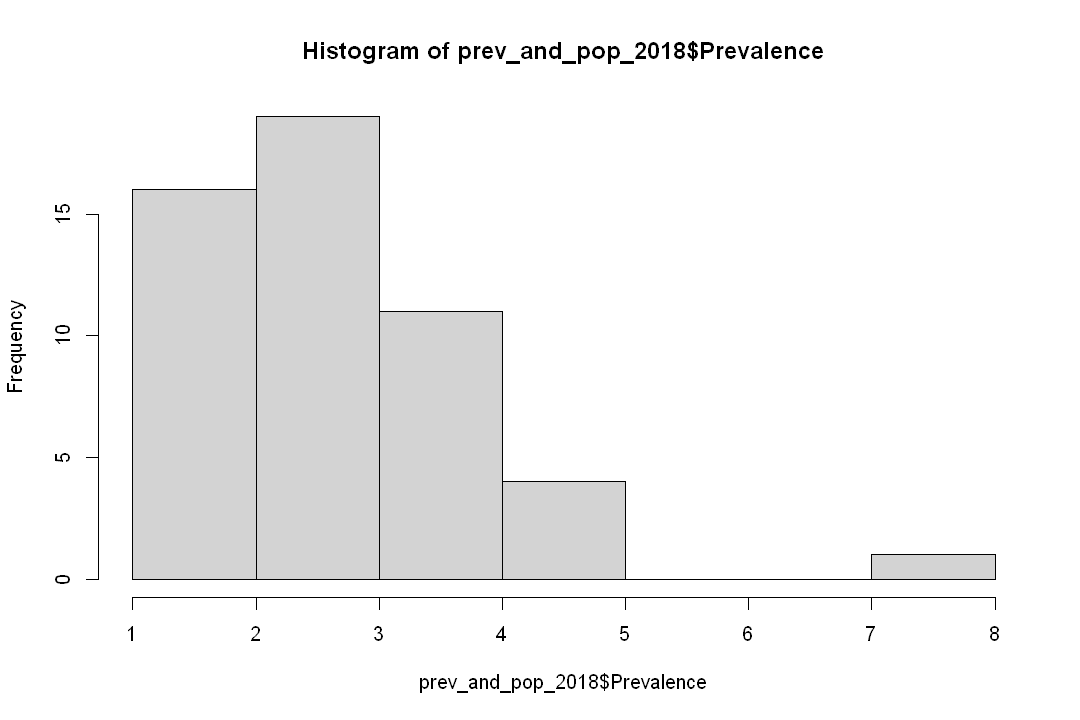

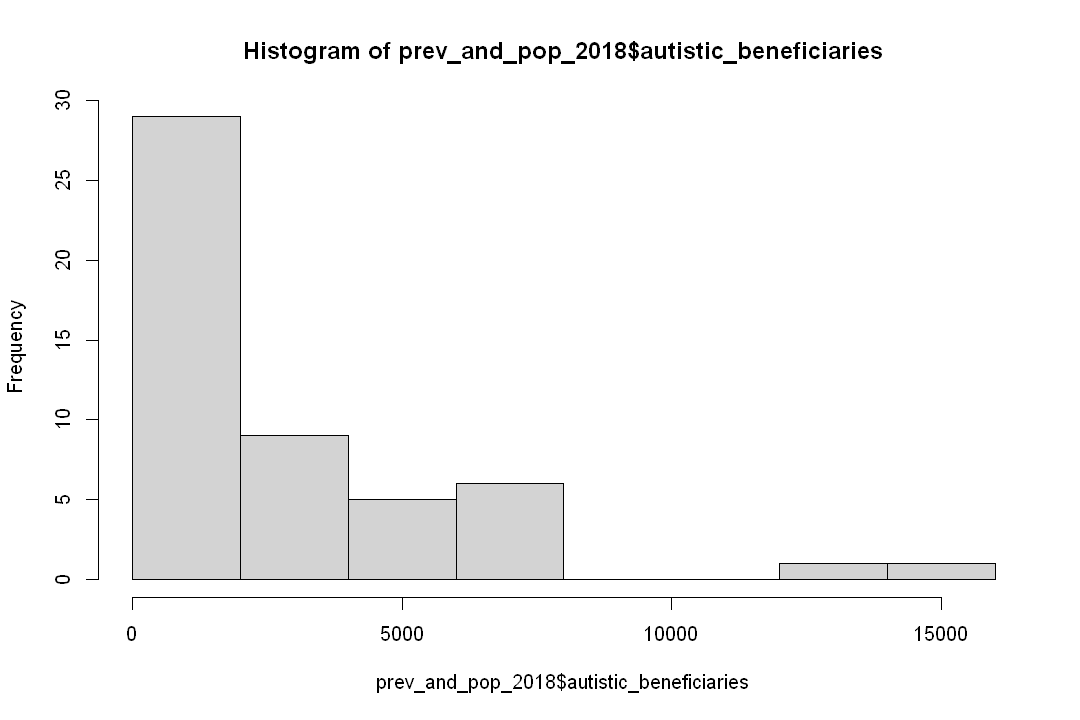

In [7]:
summary(prev_and_pop_2018)
hist(prev_and_pop_2018$Prevalence)
hist(prev_and_pop_2018$autistic_beneficiaries)

In [8]:
labels_2018_high_counts <- subset(prev_and_pop_2018, prev_and_pop_2018$autistic_beneficiaries >= 5200)
labels_2018_high_counts <- merge(labels_2018_high_counts, centroid_labels_2018, by = "state")
labels_2018_high_counts

state,Prevalence.x,FFS_beneficiaries,autistic_beneficiaries,x,y,fips,abbr,Prevalence.y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
California,2.2,5609327,12341,-1686122.5,-811984.1,06,CA,2.2
Florida,1.8,4257226,7663,1843603.1,-1757750.0,12,FL,1.8
Michigan,3.1,1963208,6086,1234642.6,-127092.2,26,MI,3.1
Minnesota,7.6,946948,7197,416754.4,238185.6,27,MN,7.6
New York,4.7,3276320,15399,2005763.1,95577.9,36,NY,4.7
Ohio,3.2,2183877,6988,1430337.5,-395264.0,39,OH,3.2
Pennsylvania,3.1,2531624,7848,1844595.5,-208004.1,42,PA,3.1
Texas,1.9,3785815,7193,183406.5,-1558446.4,48,TX,1.9


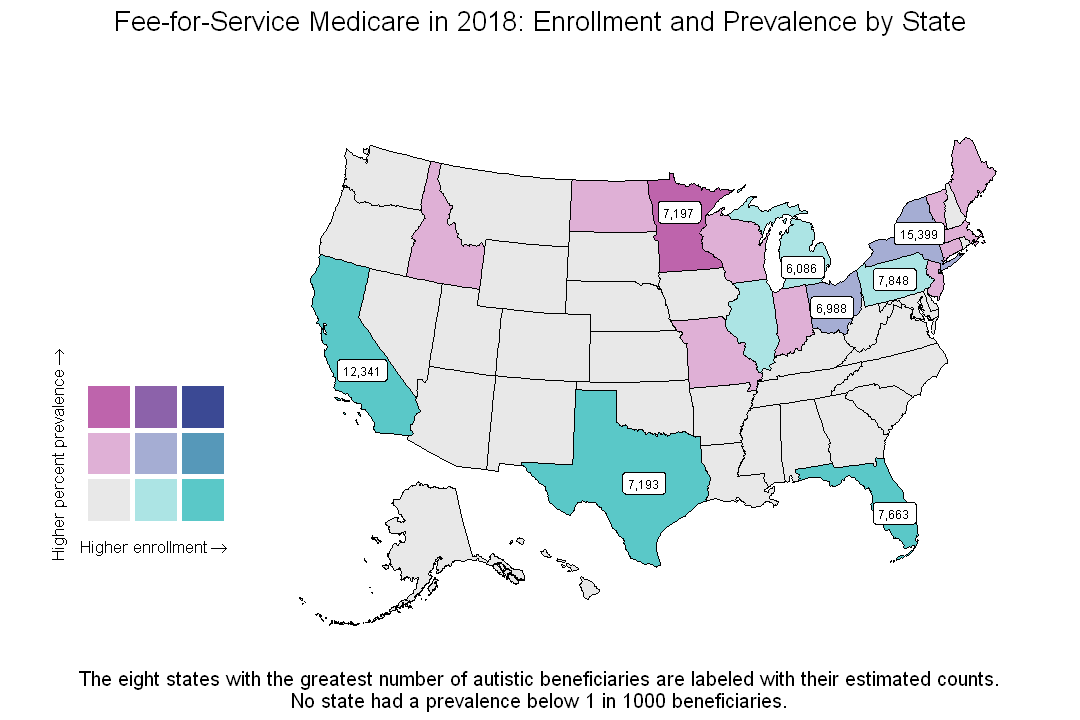

In [9]:
data <- bi_class(prev_and_pop_2018, x = FFS_beneficiaries, y = Prevalence, style = "equal", dim = 3)

map <- plot_usmap(data = data, values = "bi_class") +
    geom_label(data = labels_2018_high_counts, aes(x = x, y = y, label = scales::comma(autistic_beneficiaries)), color = "black", size = 2.5) +
    bi_scale_fill(pal = "DkBlue", dim = 3) +
    theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 13))

legend <- bi_legend(pal = "DkBlue", dim = 3, xlab = "Higher enrollment", ylab = "Higher percent prevalence", pad_width = 1.5)

map_and_legend <- ggdraw() + draw_plot(map, 0.15, 0, 0.9, 0.9) + draw_plot(legend, -0.05, 0.15, 0.35, 0.35)

final_map <- map_and_legend + plot_annotation(title = "Fee-for-Service Medicare in 2018: Enrollment and Prevalence by State",
        caption = "The eight states with the greatest number of autistic beneficiaries are labeled with their estimated counts.\nNo state had a prevalence below 1 in 1000 beneficiaries.",
        theme = theme(plot.title = element_text(hjust = 0.5, size = 16), plot.caption = element_text(hjust = 0.5, size = 12)))

final_map

ggsave("Figure 2 - FFS Medicare enrollment and ASD prevalence.jpg", width = 9.5, height = 6.5, units = "in", bg = "white", dpi = 320)

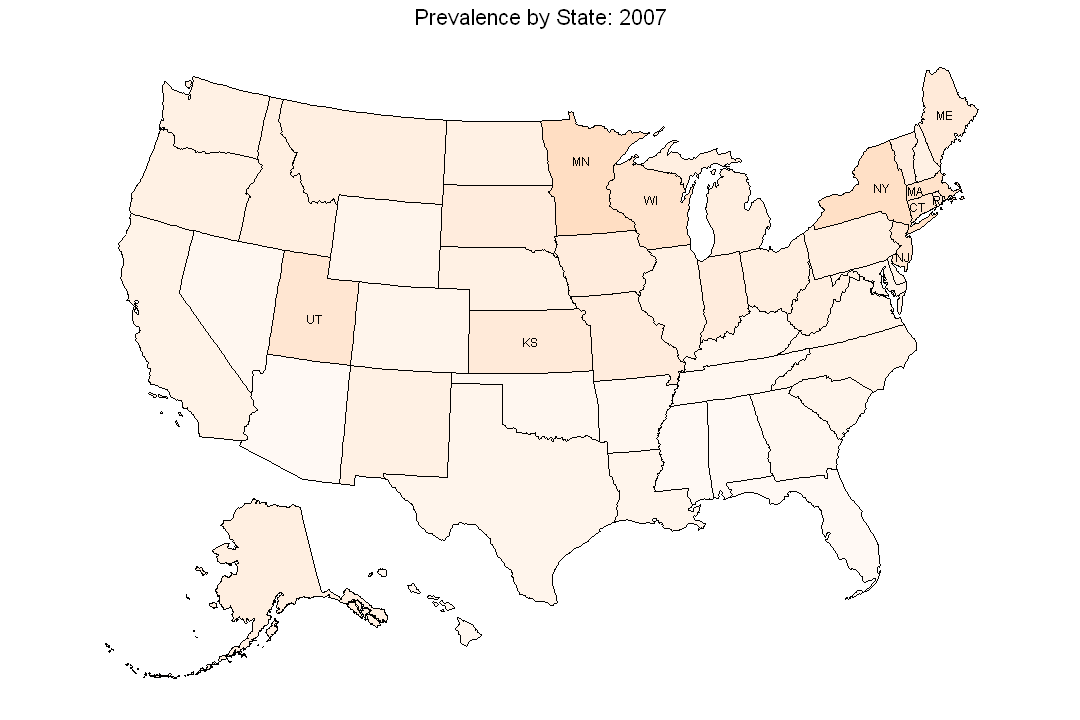

In [10]:
# Create a filled map with a legend (2007)
state_map_2007 <- plot_usmap(data = filtered_2007, values = "Prevalence") +
    ggtitle("Prevalence by State: 2007") +
    scale_fill_gradientn(limits = c(0, 8), colors = c("white", "#fdae6b", "#e6550d"), name = "Prevalence (per thousand)") +
    geom_text(data = labels_2007, aes(x = x, y = y, label = abbr), color = "black", size = 2.5) +
    theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 13))

# Display the map
state_map_2007

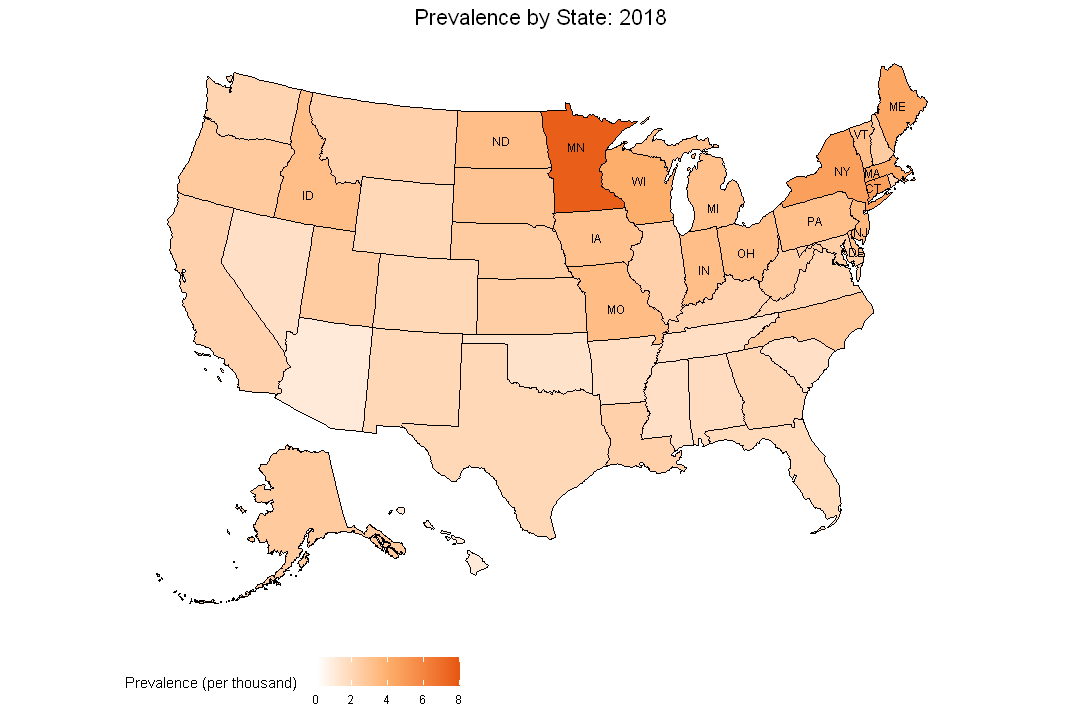

In [11]:
# Create a filled map with a legend (2018)
state_map_2018 <- plot_usmap(data = filtered_2018, values = "Prevalence") +
    ggtitle("Prevalence by State: 2018") +
    scale_fill_gradientn(limits = c(0, 8), colors = c("white", "#fdae6b", "#e6550d"), name = "Prevalence (per thousand)") +
    geom_text(data = labels_2018, aes(x = x, y = y, label = abbr), color = "black", size = 2.5) +
    theme(legend.position = "bottom", plot.title = element_text(hjust = 0.5, size = 13))

# Display the map
state_map_2018

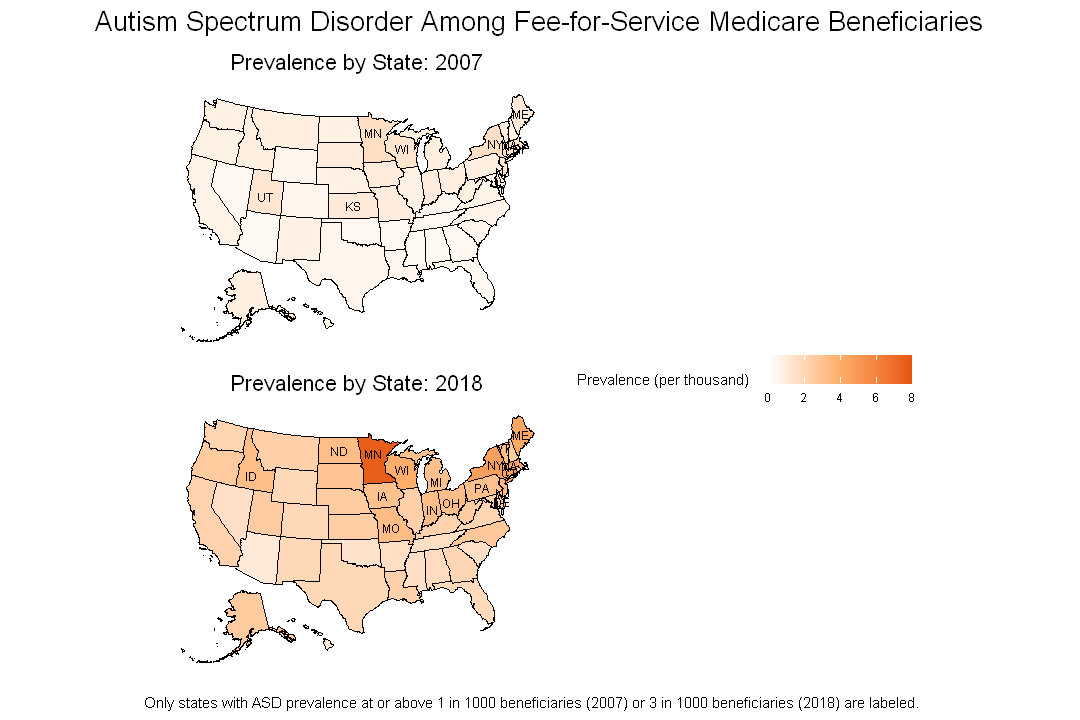

In [12]:
# Combine the two maps and add an overall title
combined <- state_map_2007 /
    state_map_2018 +
    plot_layout(guides = "collect") +
    plot_annotation(title = "Autism Spectrum Disorder Among Fee-for-Service Medicare Beneficiaries",
                    caption = "Only states with ASD prevalence at or above 1 in 1000 beneficiaries (2007) or 3 in 1000 beneficiaries (2018) are labeled.",
                    theme = theme(plot.title = element_text(hjust = 0.5, size = 16)))

# Display the combined figure
combined

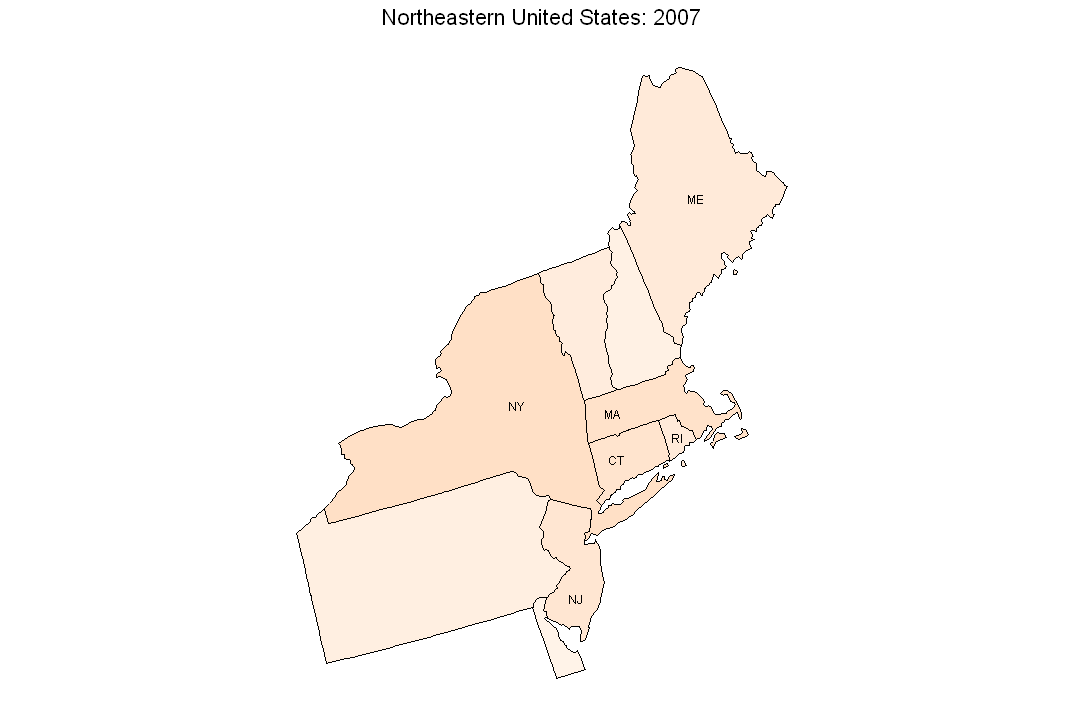

In [13]:
# Create a filled map of the Northeastern U.S., including Delaware, with a legend (2007)
region_map_2007 <- plot_usmap(data = filtered_2007, values = "Prevalence", include = c(.northeast_region, "Delaware")) +
    ggtitle("Northeastern United States: 2007") +
    scale_fill_gradientn(limits = c(0, 8), colors = c("white", "#fdae6b", "#e6550d"), name = "Prevalence (per thousand)") +
    geom_text(data = labels_2007_region, aes(x = x, y = y, label = abbr), color = "black", size = 2.5) +
    theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 13))

# Display the map
region_map_2007

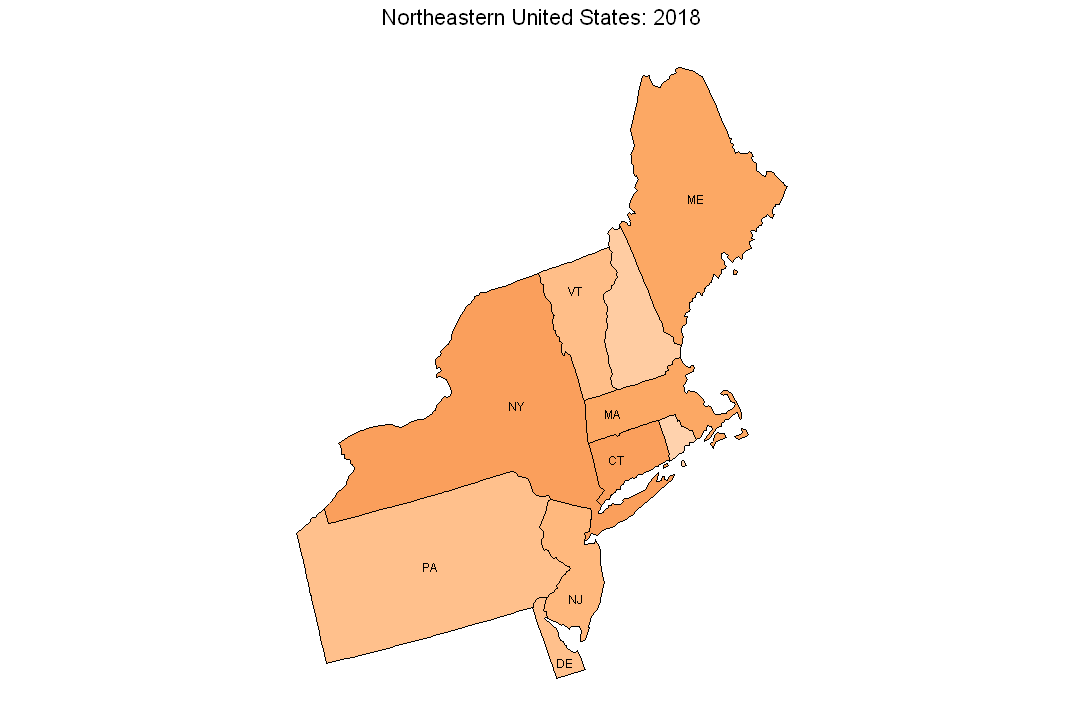

In [14]:
# Create a filled map of the Northeastern U.S., including Delaware, with a legend (2018)
region_map_2018 <- plot_usmap(data = filtered_2018, values = "Prevalence", include = c(.northeast_region, "Delaware")) +
    ggtitle("Northeastern United States: 2018") +
    scale_fill_gradientn(limits = c(0, 8), colors = c("white", "#fdae6b", "#e6550d"), name = "Prevalence (per thousand)") +
    geom_text(data = labels_2018_region, aes(x = x, y = y, label = abbr), color = "black", size = 2.5) +
    theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 13))

# Display the map
region_map_2018

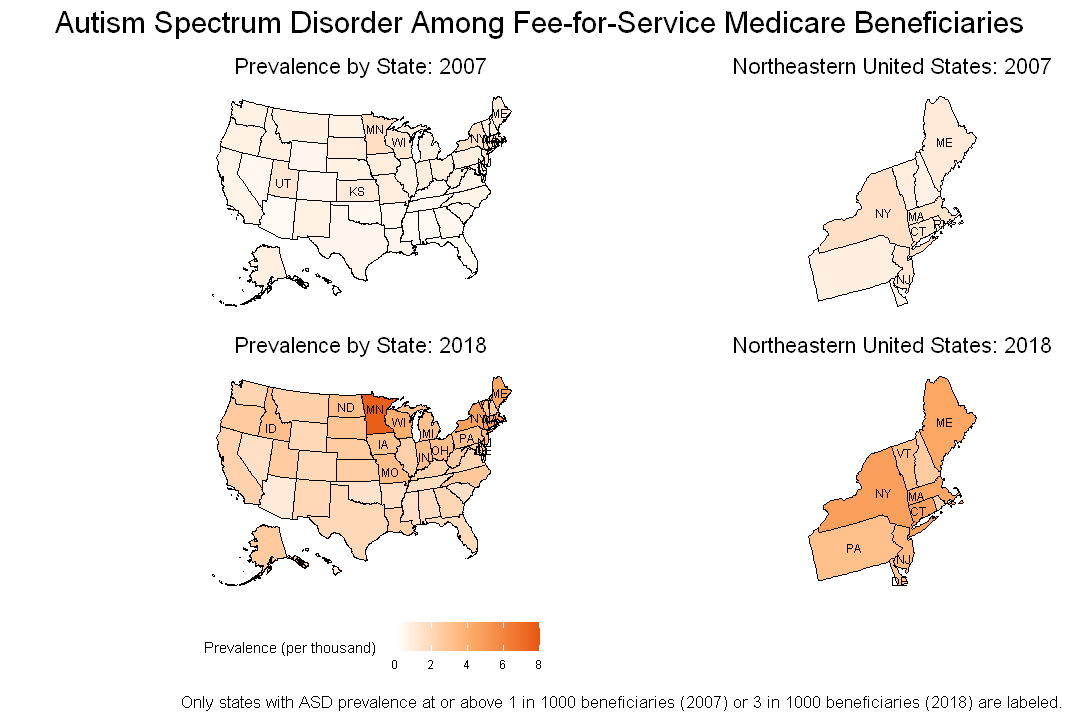

In [15]:
# Combine all four maps and add an overall title
figure <- ((state_map_2007 / state_map_2018) | (region_map_2007 / region_map_2018)) +
    plot_layout(widths = c(2, 1)) +
    plot_annotation(title = "Autism Spectrum Disorder Among Fee-for-Service Medicare Beneficiaries",
        caption = "Only states with ASD prevalence at or above 1 in 1000 beneficiaries (2007) or 3 in 1000 beneficiaries (2018) are labeled.",
        theme = theme(plot.title = element_text(hjust = 0.5, size = 18), plot.caption = element_text(size = 10)))

# Display the map
figure

# Save the figure
ggsave("Figure 1 - ASD prevalence among FFS Medicare beneficiaries (2007 and 2018).jpg", width = 9.5, height = 6.5, units = "in", bg = "white", dpi = 320)

# County-level map

In [16]:
# Import data for 2018
counties_2018_population <- read.csv("./data/Filtered/Medicare enrollment by county in 2018.csv", skip = 1)
counties_2018_prevalence <- read.csv("data/Counties_Specific_Chronic_Conditions_2018_data.csv")
head(counties_2018_population)
head(counties_2018_prevalence)

,State,County,State.County.FIPS.Code,Beneficiaries.with.Part.A.and.Part.B,Beneficiaries.in.Medicare.Advantage,Medicare.Advantage.Participation.Rate....,All,Average.Age
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,National,,NA,"56,035,753","22,532,519",40.2,"33,503,234",72
2,Alabama,,1,"985,233","427,030",43.3,"558,203",70
3,Alabama,Autauga,1001,"10,240","5,206",50.8,"5,034",71
4,Alabama,Baldwin,1003,"49,403","23,296",47.2,"26,107",72
5,Alabama,Barbour,1005,"6,118","2,712",44.3,"3,406",69
6,Alabama,Bibb,1007,"4,708","2,636",56,"2,072",68


,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,County,Alabama : Autauga,1001,All,All,All,Autism Spectrum Disorders,NA
2,County,Alabama : Baldwin,1003,All,All,All,Autism Spectrum Disorders,0.001
3,County,Alabama : Barbour,1005,All,All,All,Autism Spectrum Disorders,NA
4,County,Alabama : Bibb,1007,All,All,All,Autism Spectrum Disorders,NA
5,County,Alabama : Blount,1009,All,All,All,Autism Spectrum Disorders,NA
6,County,Alabama : Bullock,1011,All,All,All,Autism Spectrum Disorders,0.000


In [17]:
# Select only the relevant columns
counties_2018_population_filtered <- counties_2018_population[ , c("State", "State.County.FIPS.Code", "Beneficiaries.with.Part.A.and.Part.B")]
counties_2018_prevalence_filtered <- counties_2018_prevalence[ , c("Bene_Geo_Desc", "Bene_Geo_Cd", "Prvlnc")]

# Rename columns: usmap wants a column named "fips"
names(counties_2018_population_filtered) <- c("State", "fips", "FFS_beneficiaries")
names(counties_2018_prevalence_filtered) <- c("County", "fips", "Prevalence")

# Merge prevalence data with enrollment data
counties_2018 <- merge(counties_2018_population_filtered, counties_2018_prevalence_filtered, by = "fips")

# Convert relevant columns to numeric data type
counties_2018$FFS_beneficiaries <- as.numeric(gsub(",", "", counties_2018$FFS_beneficiaries))

head(counties_2018)

# Calculate number of autistic beneficiaries per county
counties_2018$autistic_beneficiaries <- counties_2018$Prevalence * counties_2018$FFS_beneficiaries
counties_2018$autistic_beneficiaries <- round(counties_2018$autistic_beneficiaries)

head(counties_2018)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


,fips,State,FFS_beneficiaries,County,Prevalence
,<int>,<chr>,<dbl>,<chr>,<dbl>
1,1001,Alabama,10240,Alabama : Autauga,NA
2,1003,Alabama,49403,Alabama : Baldwin,0.001
3,1005,Alabama,6118,Alabama : Barbour,NA
4,1007,Alabama,4708,Alabama : Bibb,NA
5,1009,Alabama,12144,Alabama : Blount,NA
6,1011,Alabama,1933,Alabama : Bullock,0.000


,fips,State,FFS_beneficiaries,County,Prevalence,autistic_beneficiaries
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,1001,Alabama,10240,Alabama : Autauga,NA,NA
2,1003,Alabama,49403,Alabama : Baldwin,0.001,49
3,1005,Alabama,6118,Alabama : Barbour,NA,NA
4,1007,Alabama,4708,Alabama : Bibb,NA,NA
5,1009,Alabama,12144,Alabama : Blount,NA,NA
6,1011,Alabama,1933,Alabama : Bullock,0.000,0


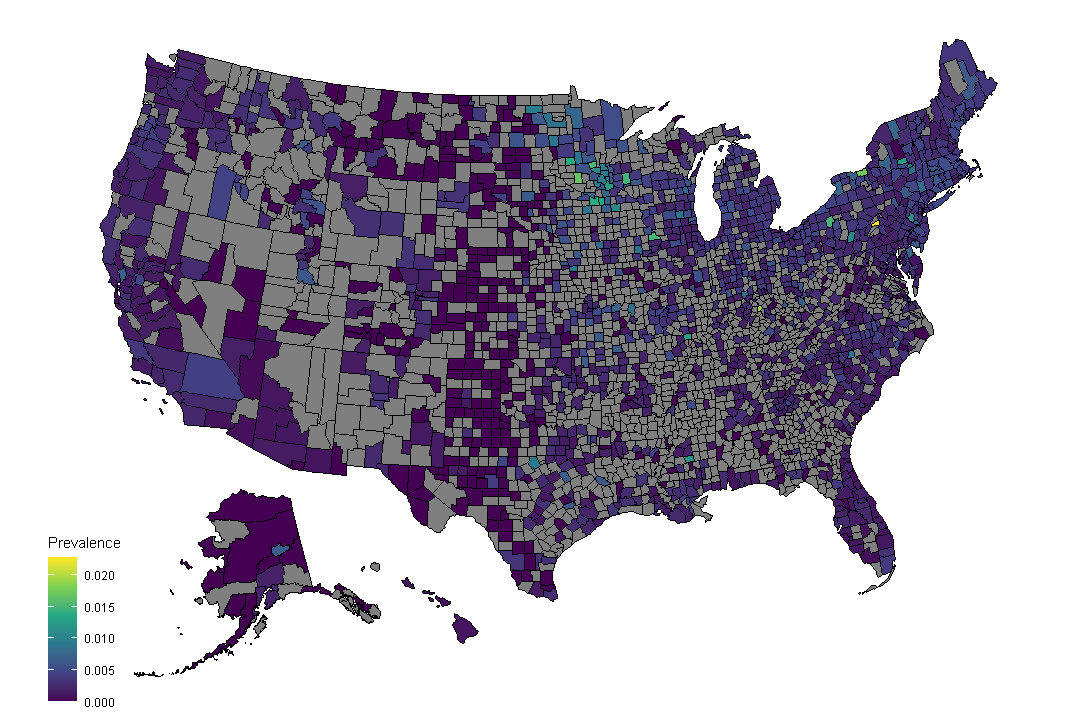

In [18]:
county_map <- plot_usmap(data = counties_2018, values = "Prevalence") +
    scale_fill_viridis_c()

county_map

Warning message in classInt::classIntervals(.data[[var]], n = dim, style = style):
"var has missing values, omitted in finding classes"
Warning message in classInt::classIntervals(.data[[var]], n = dim, style = style):
"var has missing values, omitted in finding classes"


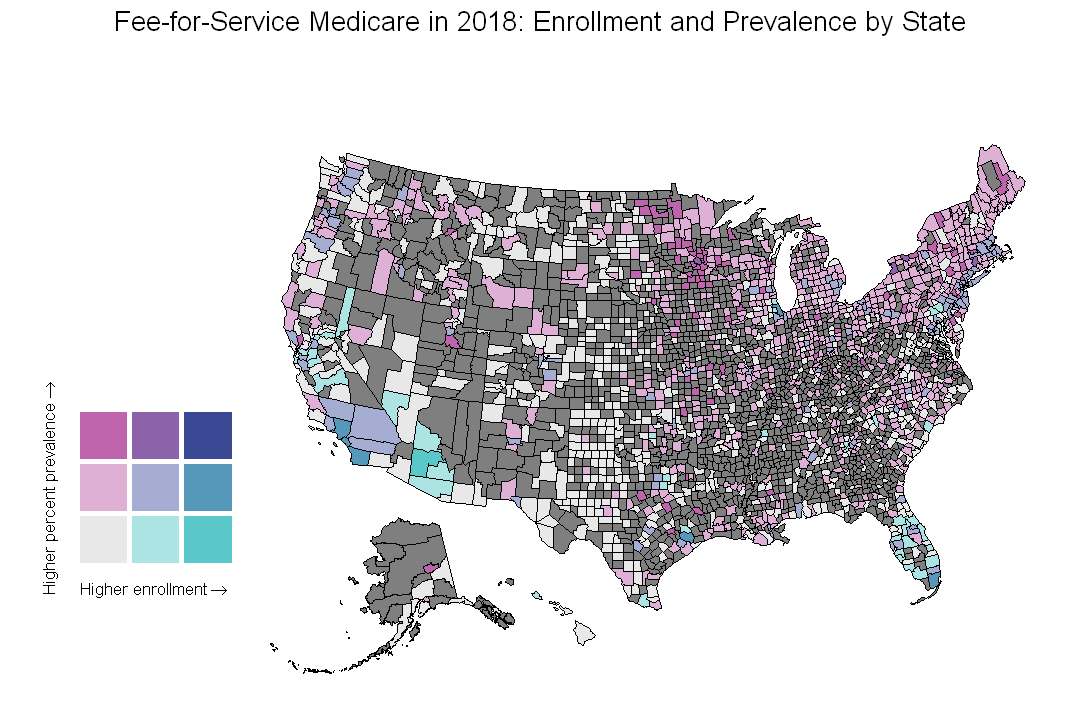

In [19]:
county_classes <- bi_class(counties_2018, x = FFS_beneficiaries, y = Prevalence, style = "jenks", dim = 3)

county_map <- plot_usmap(data = county_classes, values = "bi_class") +
    bi_scale_fill(pal = "DkBlue", dim = 3) +
    theme(legend.position = "none", plot.title = element_text(hjust = 0.5, size = 13))

county_legend <- bi_legend(pal = "DkBlue", dim = 3, xlab = "Higher enrollment", ylab = "Higher percent prevalence", pad_width = 1.5)

county_map_and_legend <- ggdraw() + draw_plot(county_map, 0.15, 0, 0.9, 0.9) + draw_plot(county_legend, -0.05, 0.15, 0.35, 0.35)

final_county_map <- county_map_and_legend + plot_annotation(title = "Fee-for-Service Medicare in 2018: Enrollment and Prevalence by State",
        theme = theme(plot.title = element_text(hjust = 0.5, size = 16), plot.caption = element_text(hjust = 0.5, size = 12)))

final_county_map